### XGBoost Regression

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Importing bostan House price dataset

In [14]:
data = pd.read_csv("/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
data.shape

(506, 14)

In [17]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [21]:
data.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

<Axes: >

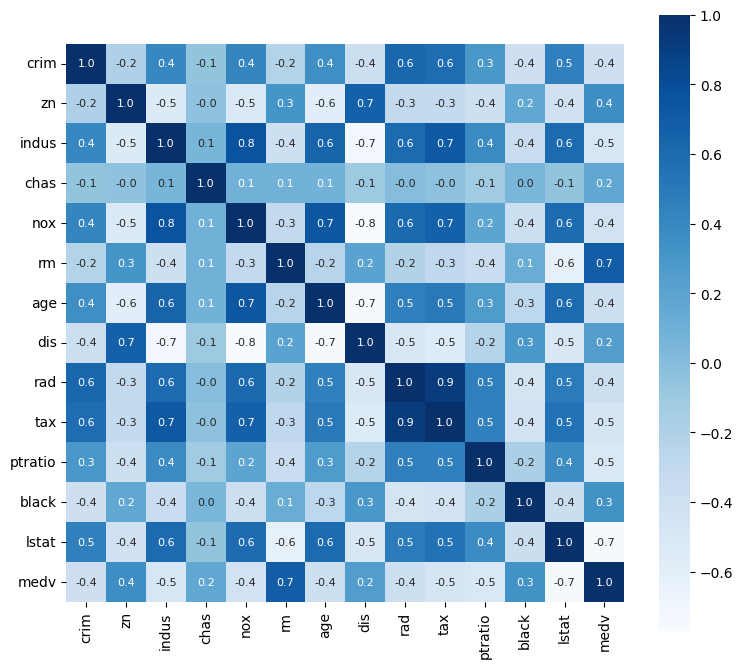

In [38]:
data_corr = data.corr()
# heatmap to understand the correlation
plt.figure(figsize=(9,8))
sns.heatmap(data_corr,cbar=True,square=True, fmt='.1f', annot=True, annot_kws = {'size':8},cmap='Blues')
#cbar=color bar,square=control the yaxis rotation, fmt=float value after decimal, annot= number representation inside a cells,

Splitting the data into train and test

In [46]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [47]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [48]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [49]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [58]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 13)
(404, 13)
(102, 13)
(404, 1)
(102, 1)


Model Training

In [59]:
from xgboost import XGBRegressor

In [64]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [73]:
train_pred= model.predict(x_train)

In [74]:
test_pred= model.predict(x_test)
test_pred

array([24.276764 , 30.46075  , 17.959005 , 22.965069 , 17.133715 ,
       22.163433 , 18.669397 , 15.236069 , 21.046127 , 20.459925 ,
       22.439089 , 18.89959  , 11.203732 , 21.811333 , 18.655327 ,
       26.25912  , 21.139784 ,  9.210471 , 47.378334 , 15.913627 ,
       25.087412 , 26.079153 , 13.452615 , 21.082066 , 15.193554 ,
       15.992098 , 20.690847 , 13.094459 , 21.131876 , 21.168287 ,
       18.848736 , 23.033901 , 14.877705 , 21.35931  , 15.263533 ,
       14.96528  , 33.754707 , 19.01804  , 22.69863  , 24.285683 ,
       19.455326 , 27.735622 , 47.043087 , 19.217285 , 21.663893 ,
       14.770664 , 13.908811 , 23.762539 , 17.538256 , 25.872328 ,
       22.392021 , 35.081337 , 17.318087 , 27.144457 , 45.176407 ,
       21.917618 , 16.05219  , 30.757784 , 22.377308 , 19.42954  ,
       25.34448  , 34.943123 , 30.451046 , 17.93282  , 25.573687 ,
       17.035986 , 14.910609 , 22.595358 , 27.416218 , 14.8786125,
       20.446955 , 30.664629 ,  9.616146 , 21.455444 , 22.9409

In [75]:
from sklearn.metrics import r2_score, mean_absolute_error

In [84]:
r2_error = r2_score(y_train, train_pred)   # R square error
print('R square Error:', r2_error*100)
mse = mean_absolute_error(y_train, train_pred)  # Mean Absolute Error
print("MAE:", mse)

R square Error: 99.99969829984965
MAE: 0.011182523717974735


Text(0.5, 1.0, 'Actual price vs Predicted price on Training data')

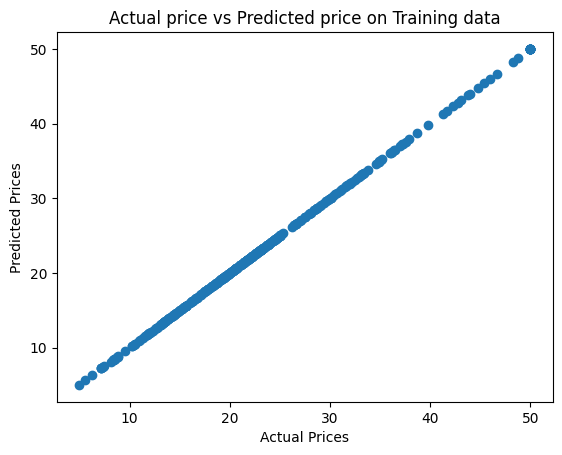

In [87]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted price on Training data")

In [83]:
r2_error = r2_score(y_test, test_pred)   # R square error
print('R square Error:', r2_error*100)
mse = mean_absolute_error(y_test, test_pred)  # Mean Absolute Error
print("MAE:", mse)

R square Error: 90.57837838492537
MAE: 1.8908873698290656


Text(0.5, 1.0, 'Actual price vs Predicted price on Testing data')

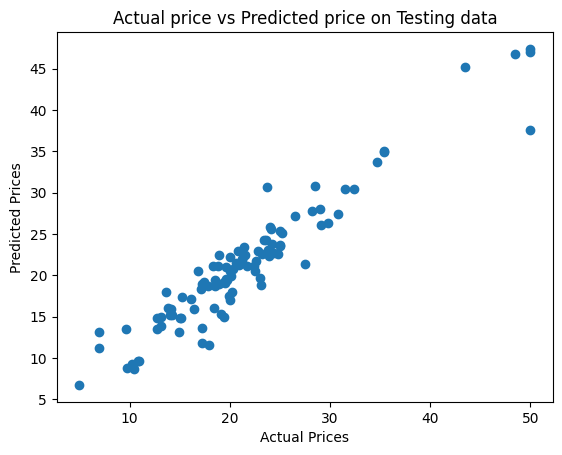

In [115]:
plt.scatter(y_test,test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted price on Testing data")